In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data import Data
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.preprocessing import DataPreprocessor
from src.model import Model
from src.evaluation import Evaluation
from src.genetic_algorithm import GeneticAlgorithm
from src.explanation import report_model

from sklearn.model_selection import train_test_split

In [3]:
data = Data()
essays = data.load()

In [4]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

In [5]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

In [7]:
model = Model()
model.fit(X_train_transformed, y_train)
predictions = model.predict(X_train_transformed)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Root Mean Squared Error: 6.086662519437259
Mean Absolute Error: 3.5794125294103325
R2 Score: 0.9625512702605065


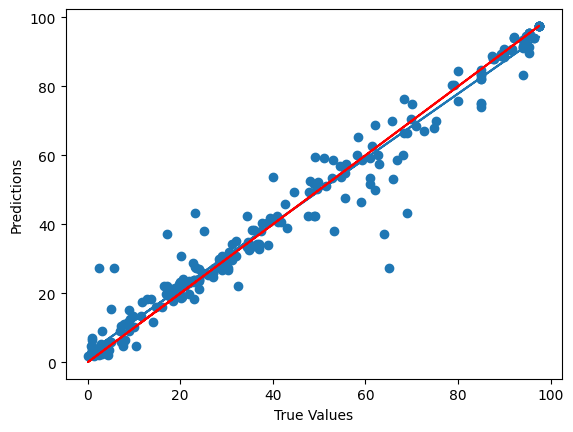

In [8]:
evaluation = Evaluation()
evaluation.report(y_train, predictions)

Root Mean Squared Error: 14.124693894334971
Mean Absolute Error: 9.748087072908273
R2 Score: 0.8074880984667281


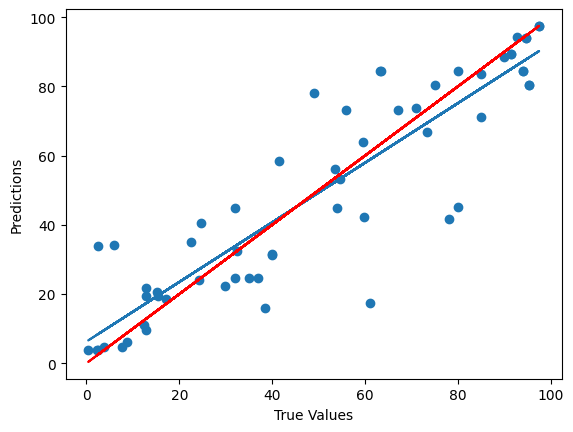

In [9]:
evaluation.report(y_test, model.predict(X_test_transformed))

In [16]:
genetic_algorithm = GeneticAlgorithm(
    X_train_transformed,
    model,
    population_size=10,
    max_generations=10,
)
genetic_algorithm.fit()
genetic_algorithm.report_best_individual()

Best individual:
|                                   |   0 |
|:----------------------------------|----:|
| MALTOTETRAOSE                     |   0 |
| %_OUTRO_CRIOPROTETOR              |   0 |
| GLICOSE                           |   0 |
| MALTOHEPTAOSE                     |   0 |
| DEXTRAN                           |   0 |
| MALTOPENTAOSE                     |   0 |
| %_SFB                             |  75 |
| Di-rhamnolipids                   |   0 |
| MALTOEXAOSE                       |   0 |
| ϒ-CYCLODEXTRIN                    |   0 |
| %_SOLUÇÃO_TOTAL                   | 100 |
| TREHALOSE                         |   0 |
| GLICEROL                          |   0 |
| %_DMSO                            |  15 |
| MALTOTRIOSE                       |   0 |
| LACTOSE                           |   0 |
| RAFFINOSE                         |   0 |
| SACAROSE                          |   0 |
| MALTOSE                           |   0 |
| %_MEIO_DE_CULTURA                 |  65 |
| OUTRO_CRIOPRO

[array([97.48]), array([53.4998]), array([53.4998]), array([53.4998]), array([53.4998]), array([27.35599484]), array([27.35599484]), array([23.64]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array([11.1203]), array

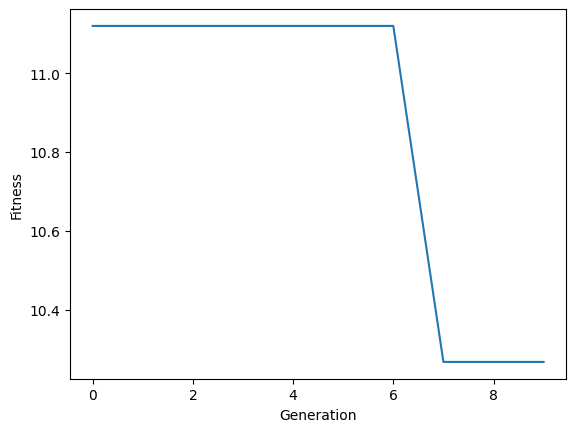

In [17]:
genetic_algorithm.show_history()

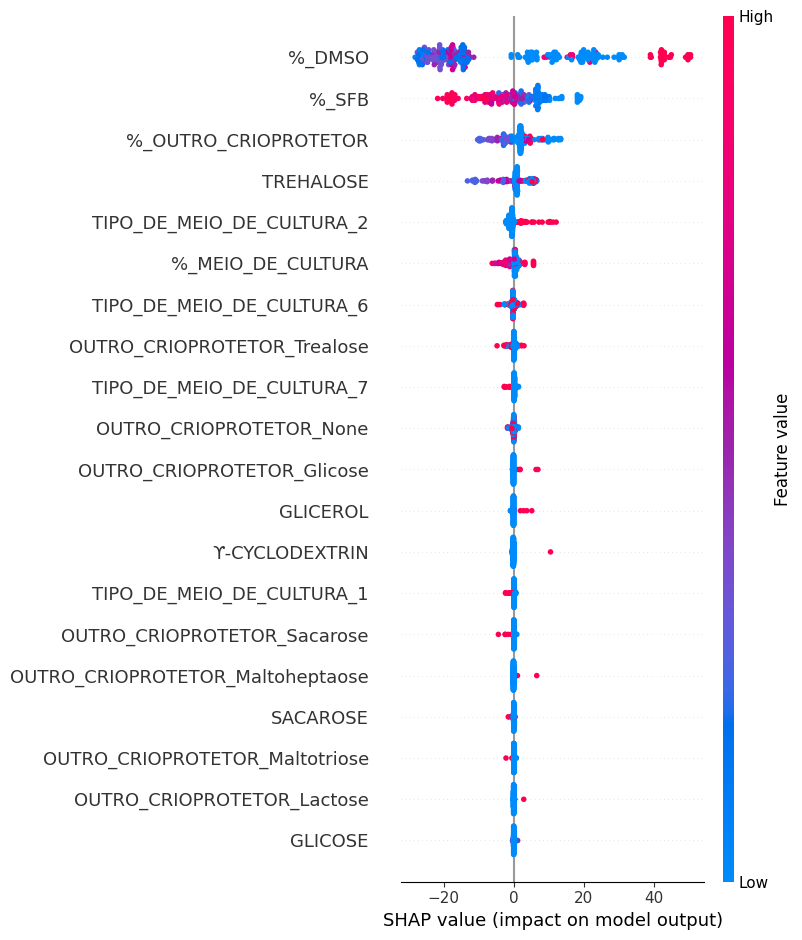

In [18]:
report_model(model, X_train_transformed)